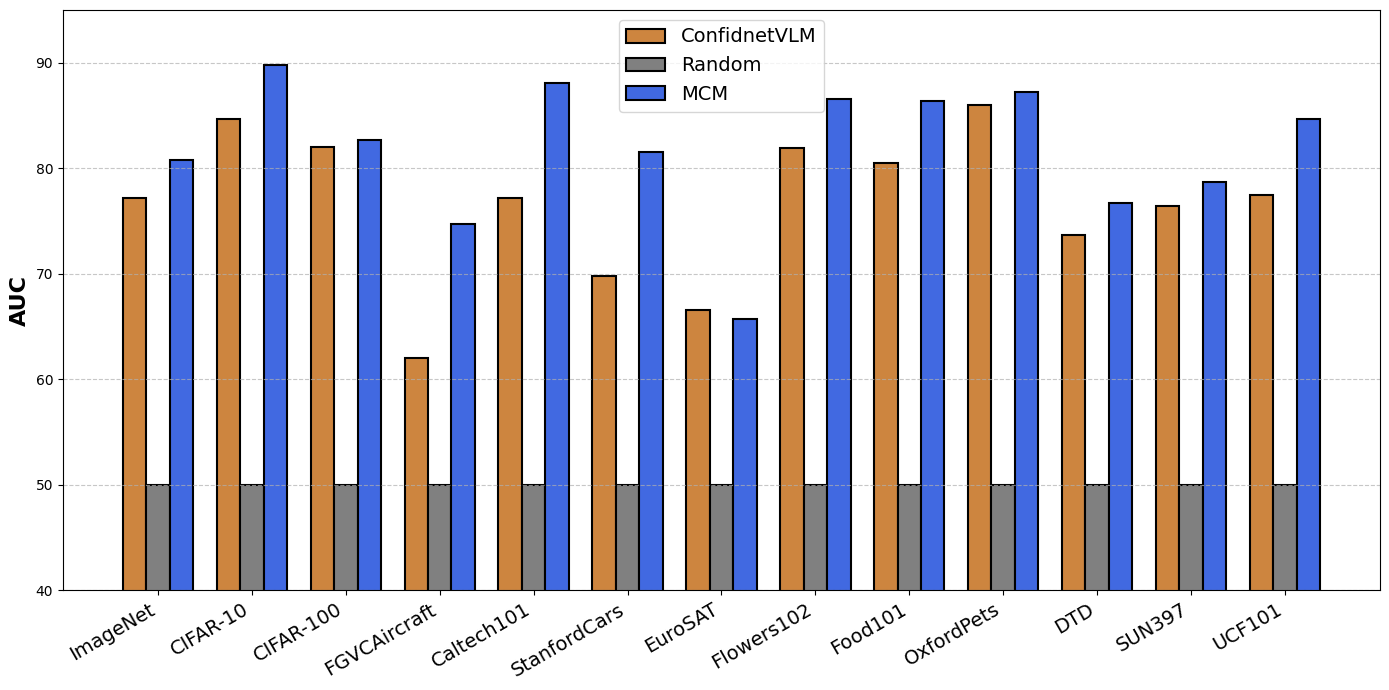

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Datasets
datasets = [
    "ImageNet", "CIFAR-10", "CIFAR-100", "FGVCAircraft", "Caltech101",
    "StanfordCars", "EuroSAT", "Flowers102", "Food101", "OxfordPets",
    "DTD", "SUN397", "UCF101"
]

# Scores
cc12m = [77.2, 84.7, 82.0, 62.0, 77.2, 69.8, 66.6, 81.9, 80.5, 86.0, 73.7, 76.4, 77.5]  # Nous (CC12M Pretrain)
random_baseline = [50.0] * len(datasets)  # Random baseline (0.5)
mcm = [80.8, 89.8, 82.7, 74.7, 88.1, 81.5, 65.7, 86.6, 86.4, 87.2, 76.7, 78.7, 84.7]  # MCM

# Positions des barres
x = np.arange(len(datasets))
width = 0.25  # Largeur des barres

# Création du graphique
fig, ax = plt.subplots(figsize=(14, 7))

# Couleurs plus classes
colors = ["peru", "grey", "royalblue"]  # Bois foncé, brun chocolat, taupe clair
 # Gris bleuté foncé, bleu-gris, bleu pâle
 # Bleu profond, gris sobre, orange chaud

# Tracé des barres avec bordures noires
ax.bar(x - width, cc12m, width, label="LVUVLM", color=colors[0], edgecolor='black', linewidth=1.5)
ax.bar(x, random_baseline, width, label="Random", color=colors[1], edgecolor='black', linewidth=1.5)
ax.bar(x + width, mcm, width, label="MCM", color=colors[2], edgecolor='black', linewidth=1.5)

# Labels et titre
#ax.set_xlabel("Zero-shot datasets", fontsize=16, fontweight='bold')
ax.set_ylabel("AUC", fontsize=16, fontweight='bold')
#ax.set_title("Zero shot uncertainty quantification", fontsize=18, fontweight='bold')
ax.set_xticks(x)
ax.set_xticklabels(datasets, rotation=30, ha="right", fontsize=14)

# Ajout de la légende avec une meilleure visibilité
ax.legend(fontsize=14, loc='upper center')

# Grid et ajustement
ax.grid(axis='y', linestyle='--', alpha=0.7)
plt.ylim(40, 95)

# Affichage
plt.tight_layout()
plt.show()


## MLP Size 

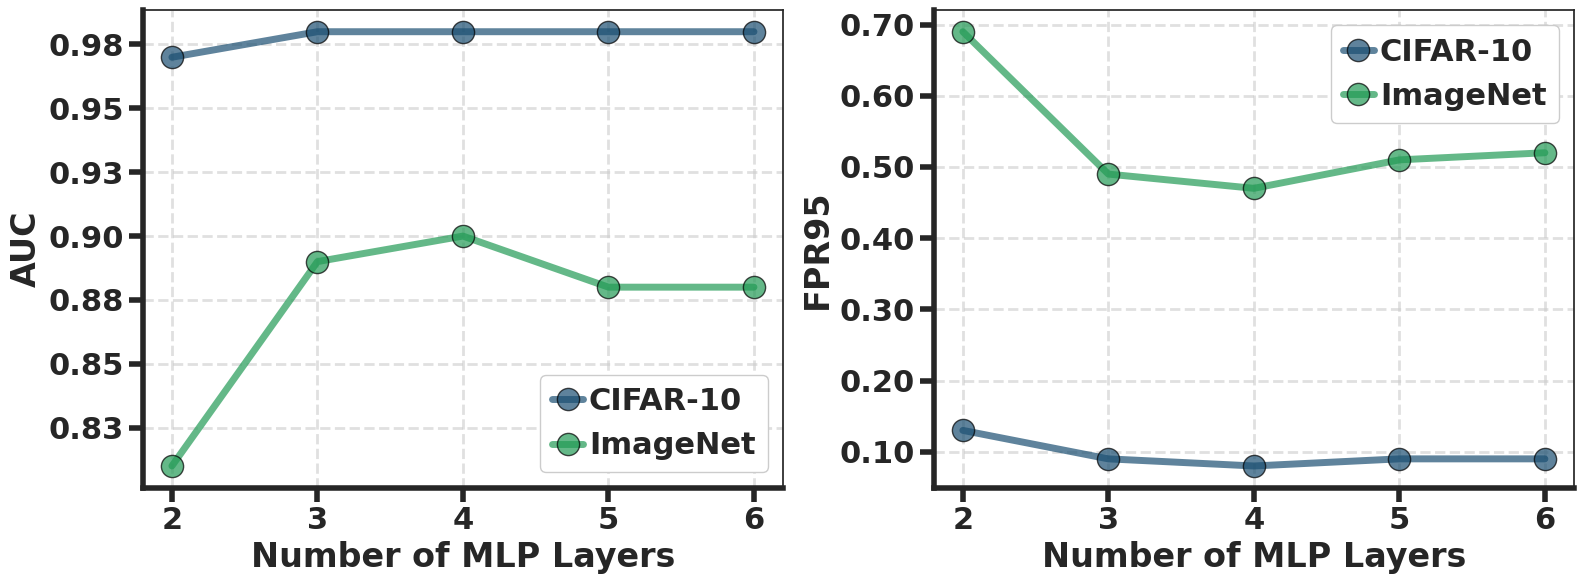

In [2]:
# Mise à jour du code avec des marqueurs plus gros, des lignes semi-transparentes et des couleurs plus stylées

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Configuration globale du style pour correspondre aux autres plots
plt.rcParams["font.family"] = "sans-serif"
plt.rcParams["font.sans-serif"] = ["Nimbus Sans"]
plt.rcParams['font.weight'] = 'bold'
plt.rcParams['axes.labelsize'] = 24  # Taille des titres des axes
plt.rcParams['xtick.labelsize'] = 26  # Taille des valeurs sur l'axe X
plt.rcParams['ytick.labelsize'] = 26  # Taille des valeurs sur l'axe Y
plt.rcParams['axes.linewidth'] = 4  # Épaisseur des axes
sns.set_theme(style="ticks")

# Données
mlp_size = [2, 3, 4, 5, 6]
acc_cifar10 = [0.97, 0.98, 0.98, 0.98, 0.98]
fpr_cifar10 = [0.13, 0.09, 0.08, 0.09, 0.09]
acc_imagenet = [0.81, 0.89, 0.90, 0.88, 0.88]
fpr_imagenet = [0.69, 0.49, 0.47, 0.51, 0.52]

# Création de la figure avec une largeur plus grande
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Couleurs améliorées pour un rendu plus classe
colors = {
    "CIFAR-10": "#1B4F72",  # Bleu foncé intense
    "ImageNet": "#239B56"   # Vert émeraude stylé
}

# Premier plot : AUC
axes[0].plot(mlp_size, acc_cifar10, marker='o', linestyle='-', color=colors["CIFAR-10"],
             markersize=16, linewidth=5, alpha=0.7, markeredgecolor='black', label="CIFAR-10")
axes[0].plot(mlp_size, acc_imagenet, marker='o', linestyle='-', color=colors["ImageNet"],
             markersize=16, linewidth=5, alpha=0.7, markeredgecolor='black', label="ImageNet")

axes[0].set_xlabel("Number of MLP Layers", fontsize=24, fontweight='bold')
axes[0].set_ylabel("AUC", fontsize=24, fontweight='bold')
axes[0].legend(fontsize=22, loc='lower right', framealpha=1, handletextpad=0.2, columnspacing=0.4, handlelength=1)
axes[0].grid(True, linestyle="--", linewidth=2, alpha=0.6)

# Second plot : FPR95
axes[1].plot(mlp_size, fpr_cifar10, marker='o', linestyle='-', color=colors["CIFAR-10"],
             markersize=16, linewidth=5, alpha=0.7, markeredgecolor='black', label="CIFAR-10")
axes[1].plot(mlp_size, fpr_imagenet, marker='o', linestyle='-', color=colors["ImageNet"],
             markersize=16, linewidth=5, alpha=0.7, markeredgecolor='black', label="ImageNet")

axes[1].set_xlabel("Number of MLP Layers", fontsize=24, fontweight='bold')
axes[1].set_ylabel("FPR95", fontsize=24, fontweight='bold')
axes[1].legend(fontsize=22, loc='upper right', framealpha=1, handletextpad=0.2, columnspacing=0.4, handlelength=1)
axes[1].grid(True, linestyle="--", linewidth=2, alpha=0.6)

# Ajustement des axes
for ax in axes:
    ax.set_xticks(mlp_size)  # Définir les ticks de l'axe X
    ax.set_xticklabels([str(v) for v in mlp_size])  # Convertir en texte
    ax.yaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f'{x:.2f}')) 
    ax.spines['bottom'].set_linewidth(4)
    ax.spines['left'].set_linewidth(4)
    ax.tick_params(axis='x', which='major', width=4, length=10)
    ax.tick_params(axis='y', which='major', width=4, length=10)

    # Rendre les ticks plus visibles et gras
    for tick in ax.get_xticklabels() + ax.get_yticklabels():
        tick.set_fontweight('bold')
        tick.set_fontsize(22)

plt.tight_layout()
plt.show()

In [21]:
import os
import matplotlib
matplotlib.use('Agg')
import matplotlib.pyplot as plt
plt.rcParams["font.family"] = "sans-serif"
plt.rcParams["font.sans-serif"] = ["Nimbus Sans"]
plt.rcParams['font.weight'] = 'bold'
import seaborn as sns
# configs
sns.set_theme(style="ticks")

# FPR95 plot

batch_size = [128, 512, 1024, 2048, 4096, 8192]
fpr = {"MCM":       [15.6, 54.6, 58.8, 61.5, 64.2, 65.3],
       "LVU": [76.2, 76.5, 76.5, 76.8, 77.0, 77.0],
       "LuMen":    [15.6, 22.5, 25.2, 28.7, 31.8, 34.9]}

plt.plot(batch_size, fpr["LuMen"], linestyle='-', marker='o', color="lightblue", alpha=0.6, markersize=14, linewidth=6,
         markeredgecolor='k', zorder=3)
plt.plot(batch_size, fpr["LVU"], linestyle='-', marker='o', color="brown", alpha=0.3, markersize=14, linewidth=6,
         markeredgecolor='k', zorder=3)
plt.plot(batch_size, fpr["MCM"], linestyle='-', marker='o', color="green", alpha=0.3, markersize=14, linewidth=6,
         markeredgecolor='k', zorder=3)
plt.legend(labels=["LuMen", "LVU", "MCM"], loc='lower right', prop={'weight': 'bold', 'size': 20},
           framealpha=1, ncols=2, handletextpad=0.2, columnspacing=0.4, handlelength=1).set_zorder(2)
plt.plot(batch_size, fpr["LuMen"], linestyle='none', marker='o', color="lightblue", alpha=1, markersize=15, linewidth=5,
         markeredgecolor='k', markeredgewidth=1.5, zorder=3)
plt.plot(batch_size, fpr["LVU"], linestyle='none', marker='o', color="brown", alpha=1, markersize=15, linewidth=5,
         markeredgecolor='k', markeredgewidth=1.5, zorder=3)
plt.plot(batch_size, fpr["MCM"], linestyle='none', marker='o', color="green", alpha=1, markersize=15, linewidth=5,
         markeredgecolor='k', markeredgewidth=1.5, zorder=3)
plt.xlabel(r"Inference batch size", fontsize=24, weight="bold")
plt.ylabel(r'FPR95$\downarrow$', fontsize=24, weight="bold")
plt.tick_params(axis='both', which='major', labelsize=24)
ax = plt.gca()
plt.grid(axis="both", linestyle='--', linewidth=2, zorder=-1)
plt.yticks([0, 15, 30, 45, 60, 75, 90])
plt.xticks([128, 512, 1024, 2048, 4096, 8192], labels=["", "", "1k", "", "4k", "8k"])

ax = plt.gca().axis()

plt.gca().axis((-200, 8500, 0, 90))
ax = plt.gca()
for tick in ax.get_xticklabels():
        tick.set_fontweight('bold')
for tick in ax.get_yticklabels():
        tick.set_fontweight('bold')
plt.tight_layout()


path = "../visu/batch_size_fpr_effect.pdf"
plt.savefig(path, dpi=300, format='pdf', bbox_inches='tight')
plt.close()

# AUC plot

batch_size = [128, 512, 1024, 2048, 4096, 8192]
auc = {"MCM":       [92.7, 90.1, 88.8, 87.5, 86.4, 85.3],
       "LVU": [75.2, 74.8, 74.4, 74.3, 73.9, 73.6],
       "LuMen":    [96.9, 95.7, 95.2, 94.4, 93.6, 92.8]}

plt.plot(batch_size, auc["LuMen"], linestyle='-', marker='o', color="lightblue", alpha=0.6, markersize=14, linewidth=6,
         markeredgecolor='k', zorder=3)
plt.plot(batch_size, auc["LVU"], linestyle='-', marker='o', color="brown", alpha=0.3, markersize=14, linewidth=6,
         markeredgecolor='k', zorder=3)
plt.plot(batch_size, auc["MCM"], linestyle='-', marker='o', color="green", alpha=0.3, markersize=14, linewidth=6,
         markeredgecolor='k', zorder=3)
#plt.legend(labels=["LuMen", "LVU", "MCM"], loc='lower right', prop={'weight': 'bold', 'size': 20},
#           framealpha=1, ncols=2, handletextpad=0.2, columnspacing=0.4, handlelength=1).set_zorder(2)
plt.plot(batch_size, auc["LuMen"], linestyle='none', marker='o', color="lightblue", alpha=1, markersize=15, linewidth=5,
         markeredgecolor='k', markeredgewidth=1.5, zorder=3)
plt.plot(batch_size, auc["LVU"], linestyle='none', marker='o', color="brown", alpha=1, markersize=15, linewidth=5,
         markeredgecolor='k', markeredgewidth=1.5, zorder=3)
plt.plot(batch_size, auc["MCM"], linestyle='none', marker='o', color="green", alpha=1, markersize=15, linewidth=5,
         markeredgecolor='k', markeredgewidth=1.5, zorder=3)

plt.xlabel(r"Inference batch size", fontsize=24, weight="bold")
plt.ylabel(r'AUC$\uparrow$', fontsize=24, weight="bold")
plt.tick_params(axis='both', which='major', labelsize=24)
ax = plt.gca()
plt.grid(axis="both", linestyle='--', linewidth=2, zorder=-1)
plt.yticks([70, 75, 80, 85, 90, 95, 100])
plt.xticks([128, 512, 1024, 2048, 4096, 8192], labels=["", "", "1k", "", "4k", "8k"])
ax = plt.gca().axis()

plt.gca().axis((-200, 8500, 70, 100))
ax = plt.gca()
for tick in ax.get_xticklabels():
        tick.set_fontweight('bold')
for tick in ax.get_yticklabels():
        tick.set_fontweight('bold')
plt.tight_layout()



path = "../visu/batch_size_auc_effect.pdf"
plt.savefig(path, dpi=300, format='pdf', bbox_inches='tight')
plt.close()